## World Happiness Report - Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv("world-happiness-report.csv")
locations=pd.read_csv("locations.csv").drop("Unnamed: 0",axis=1)
df=pd.merge(df,locations,on="Country name")

In [3]:
df.head(3)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
0,Afghanistan,2008,3.724,7.370,0.451,50.8,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.2,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.6,0.600,0.121,0.707,0.618,0.275,South Asia


In [4]:
df.tail(3)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
1883,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,0.710,0.212,Sub-Saharan Africa
1884,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831,0.716,0.235,Sub-Saharan Africa
1885,Zimbabwe,2020,3.160,7.829,0.717,56.8,0.643,-0.009,0.789,0.703,0.346,Sub-Saharan Africa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1885
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1886 non-null   object 
 1   year                              1886 non-null   int64  
 2   Life Ladder                       1886 non-null   float64
 3   Log GDP per capita                1862 non-null   float64
 4   Social support                    1877 non-null   float64
 5   Healthy life expectancy at birth  1835 non-null   float64
 6   Freedom to make life choices      1856 non-null   float64
 7   Generosity                        1810 non-null   float64
 8   Perceptions of corruption         1782 non-null   float64
 9   Positive affect                   1868 non-null   float64
 10  Negative affect                   1873 non-null   float64
 11  Regional indicator                1886 non-null   object 
dtypes: flo

In [6]:
df["Country name"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Haiti',
       'Honduras', 'Hong Kong S.A.R. of China', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon',
       'Lesotho', 'Liber

In [7]:
df.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2007, 2020, 2006, 2005], dtype=int64)

In [8]:
#Log GDP per capita,Social support etc null ones were filled with the average of the country's values in other years
for column in df.select_dtypes(include=np.number):
    df[column].fillna(df.groupby("Country name")[column].mean()[1],inplace=True)


In [9]:
df.sample(3)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
349,Colombia,2012,6.375,9.471,0.914,66.14,0.828000,-0.009,0.868000,0.846,0.294,Latin America and Caribbean
329,China,2007,4.863,8.824,0.811,67.06,0.662923,-0.176,0.869385,0.817,0.159,East Asia
1595,Sweden,2015,7.289,10.853,0.929,72.30,0.935000,0.211,0.232000,0.818,0.191,Western Europe


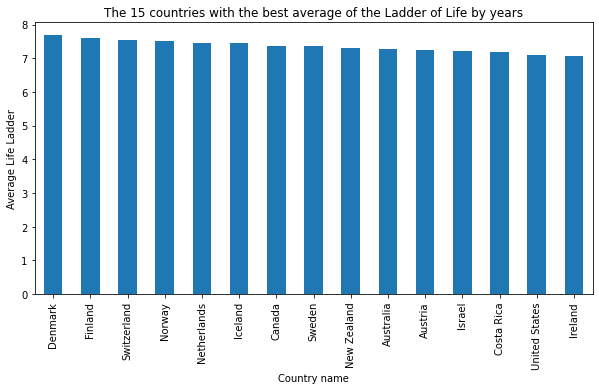

In [10]:
the_best_life_ladder=df.groupby("Country name")["Life Ladder"].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,5))
plt.title("The 15 countries with the best average of the Ladder of Life by years")
plt.ylabel("Average Life Ladder")
the_best_life_ladder.plot.bar();

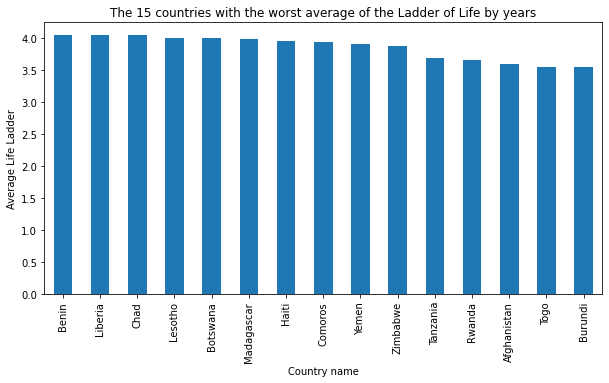

In [11]:
the_best_life_ladder=df.groupby("Country name")["Life Ladder"].mean().sort_values(ascending=False).tail(15)
plt.figure(figsize=(10,5))
plt.title("The 15 countries with the worst average of the Ladder of Life by years")
plt.ylabel("Average Life Ladder")
the_best_life_ladder.plot.bar();

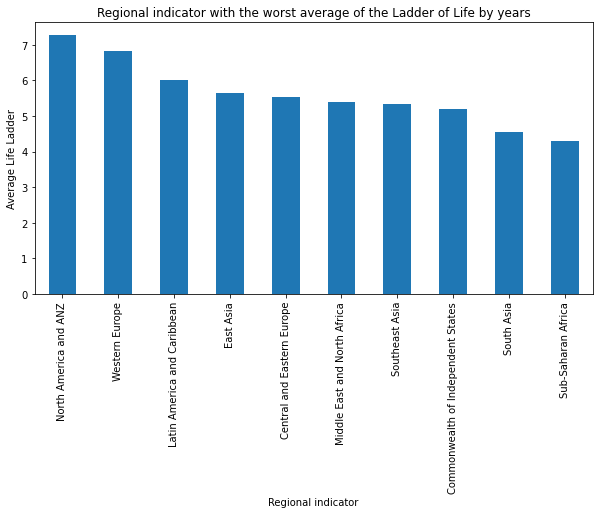

In [12]:
the_best_life_ladder=df.groupby("Regional indicator")["Life Ladder"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Regional indicator with the worst average of the Ladder of Life by years")
plt.ylabel("Average Life Ladder")
the_best_life_ladder.plot.bar();

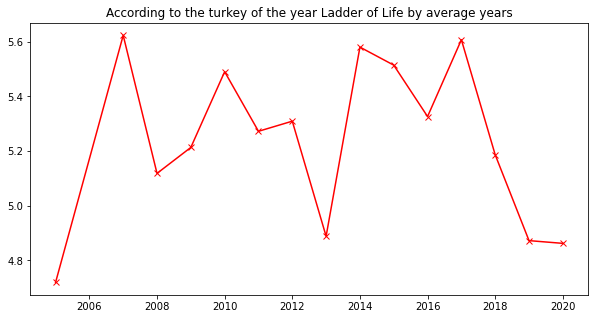

In [13]:
plt.figure(figsize=(10,5))
plt.title("According to the turkey of the year Ladder of Life by average years")
df_Turkey=df[df["Country name"]=="Turkey"]
plt.plot(df_Turkey['year'],df_Turkey['Life Ladder'],marker='x', color='r')

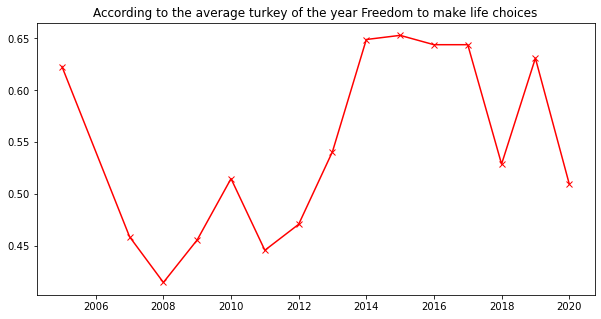

In [14]:
plt.figure(figsize=(10,5))
plt.title("According to the average turkey of the year Freedom to make life choices")
df_Turkey=df[df["Country name"]=="Turkey"]
plt.plot(df_Turkey['year'],df_Turkey["Freedom to make life choices"],marker='x', color='r')

In [15]:
df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.038769,0.077135,-0.003119,0.167897,0.228064,-0.027694,-0.077342,-0.004985,0.195902
Life Ladder,0.038769,1.000000,0.786588,0.702457,0.739144,0.516687,0.183578,-0.425083,0.521189,-0.280871
Log GDP per capita,0.077135,0.786588,1.000000,0.691170,0.839101,0.355272,-0.010532,-0.324621,0.280856,-0.204474
Social support,-0.003119,0.702457,0.691170,1.000000,0.602402,0.412390,0.065563,-0.217926,0.425848,-0.378300
Healthy life expectancy at birth,0.167897,0.739144,0.839101,0.602402,1.000000,0.372307,0.019813,-0.314004,0.300209,-0.128318
Freedom to make life choices,0.228064,0.516687,0.355272,0.412390,0.372307,1.000000,0.322140,-0.467383,0.590864,-0.242439
Generosity,-0.027694,0.183578,-0.010532,0.065563,0.019813,0.322140,1.000000,-0.279696,0.361261,-0.108227
Perceptions of corruption,-0.077342,-0.425083,-0.324621,-0.217926,-0.314004,-0.467383,-0.279696,1.000000,-0.292366,0.257514
Positive affect,-0.004985,0.521189,0.280856,0.425848,0.300209,0.590864,0.361261,-0.292366,1.000000,-0.359085
Negative affect,0.195902,-0.280871,-0.204474,-0.378300,-0.128318,-0.242439,-0.108227,0.257514,-0.359085,1.000000


In [16]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000
mean,2013.259809,5.487639,9.387763,0.814504,63.696833,0.743489,-0.004573,0.754553,0.710870,0.267697
std,4.195279,1.110343,1.132690,0.116174,7.342558,0.139866,0.160646,0.184199,0.105825,0.082700
min,2005.000000,2.375000,6.635000,0.291000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.660250,8.489250,0.750250,59.315000,0.652250,-0.111000,0.699000,0.629000,0.206000
50%,2013.000000,5.405000,9.461000,0.836000,65.500000,0.762000,-0.035000,0.812000,0.721500,0.259000
75%,2017.000000,6.299000,10.355250,0.906000,68.600000,0.855000,0.085000,0.869385,0.799000,0.319000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.591000


<AxesSubplot:>

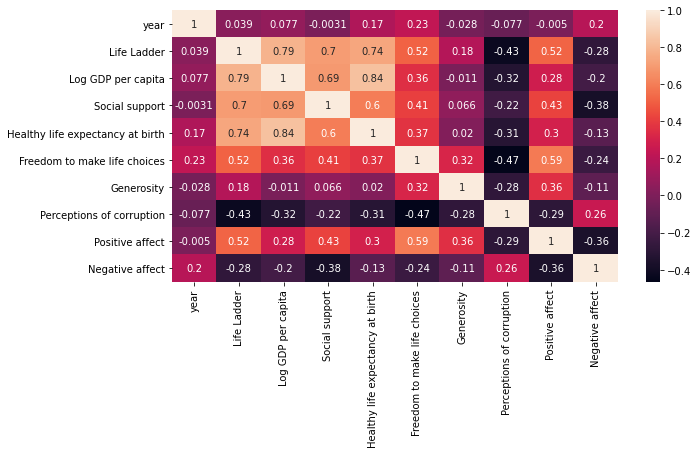

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [18]:
x=pd.get_dummies(df,drop_first=True)

In [19]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
preds=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model-model fit(x) 
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print ("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
        preds.append(pred)



In [20]:
clust(10)

Number of cluster 2, silhouette 0.46812633041590784
Number of cluster 3, silhouette 0.358515131952566
Number of cluster 4, silhouette 0.3449451930634733
Number of cluster 5, silhouette 0.34262648847886085
Number of cluster 6, silhouette 0.34044517578165134
Number of cluster 7, silhouette 0.33294054527750344
Number of cluster 8, silhouette 0.3243874050192456
Number of cluster 9, silhouette 0.3139226465473697
Number of cluster 10, silhouette 0.31151098256785187


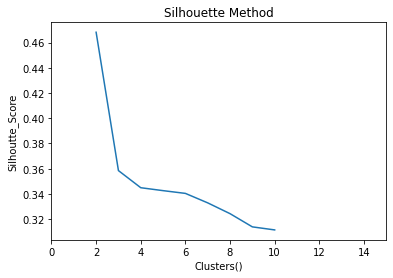

In [21]:
plt.plot(allclusters,allscore)
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

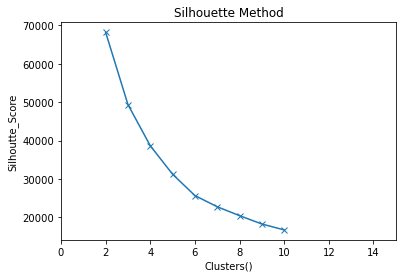

In [22]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

No handles with labels found to put in legend.


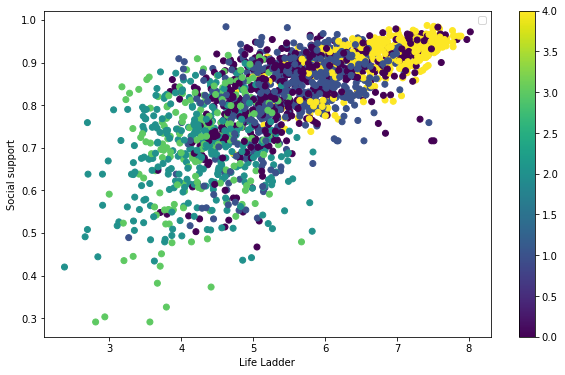

In [23]:
#If clustering is done for 4
plt.figure(figsize=(10,6))
plt.scatter(x["Life Ladder"],x["Social support"],c=preds[3])
plt.xlabel("Life Ladder")
plt.ylabel("Social support")
plt.legend()
plt.colorbar()
plt.show()

In [24]:
df["cluster"]=preds[3]

In [25]:
df[["Country name","Regional indicator","cluster"]].sample(20).sort_index()

,Country name,Regional indicator,cluster
48,Armenia,Commonwealth of Independent States,0
115,Bangladesh,South Asia,0
214,Brazil,Latin America and Caribbean,0
548,France,Western Europe,4
678,Hong Kong S.A.R. of China,East Asia,1
743,Iran,Middle East and North Africa,1
915,Kyrgyzstan,Commonwealth of Independent States,1
928,Latvia,Central and Eastern Europe,0
937,Latvia,Central and Eastern Europe,1
1269,North Macedonia,Central and Eastern Europe,1
